<div style="text-align: center;">
    <img src="https://us.123rf.com/450wm/siberianart/siberianart2208/siberianart220800064/190562415-human-obesity-info-graphic-vector-flat-poster.jpg?ver=6" alt="Logo" width="500">
    <p style="font-size: 50px; font-weight: bold;">Predicting obesity levels based on eating habits and physical condition</p>
    <p style="font-size: 50px; font-weight: normal;"> Intern BCC 2025</p>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/ObesityDataSet.csv')

## Data Understanding

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
df.duplicated().sum()

24

In [10]:
df.isnull().sum() / len(df) * 100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

In [11]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [12]:
df.shape

(2111, 17)

# Data Cleaning

In [13]:
df.dropna()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
df.fillna(0)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [15]:

print("Data setelah menghapus baris dengan nilai null:")
print(df.info())

print("\nData setelah mengisi nilai null dengan 0:")
print(df.describe())

Data setelah menghapus baris dengan nilai null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null  

In [16]:
df.drop_duplicates()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [17]:
# Konfersi type data age menjadi int
df['Age'] = df['Age'].astype(int)

# Menghapus nilai height yang tidak masuk akal
df = df[(df['Height'] > 1.0) & (df['Height'] < 2.5)]

# Menggunakan one-hot encoding untuk kolom gender
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'])

print("Data setelah pembersihan lebih lanjut:")
print(df.info())

Data setelah pembersihan lebih lanjut:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   int32  
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   CH2O                                2111 non-null   float64
 6   FAF                                 2111 non-null   float64
 7   TUE                                 2111 non-null   float64
 8   Gender_Female                       2111 non-null   bool   
 9   Gender_Male                         2111 non-null   bool   
 10  family_history_with_overweight_no   2111 non-null   bool   
 11  fami

In [18]:
def camel_case(s):
    s = re.sub(r"(_|-)+", " ", s).title().replace(" ", "")
    return ''.join([s[0].lower(), s[1:]])

df.columns = [camel_case(col) for col in df.columns]

print(df.head())

   age  height  weight  fcvc  ncp  ch2O  faf  tue  genderFemale  genderMale  \
0   21    1.62    64.0   2.0  3.0   2.0  0.0  1.0          True       False   
1   21    1.52    56.0   3.0  3.0   3.0  3.0  0.0          True       False   
2   23    1.80    77.0   2.0  3.0   2.0  2.0  1.0         False        True   
3   27    1.80    87.0   3.0  3.0   2.0  2.0  0.0         False        True   
4   22    1.78    89.8   2.0  1.0   2.0  0.0  0.0         False        True   

   ...  mtransMotorbike  mtransPublicTransportation  mtransWalking  \
0  ...            False                        True          False   
1  ...            False                        True          False   
2  ...            False                        True          False   
3  ...            False                       False           True   
4  ...            False                        True          False   

   nobeyesdadInsufficientWeight  nobeyesdadNormalWeight  \
0                         False              

In [19]:
required_columns = [
    'age', 'height', 'weight', 'fcvc', 'ncp', 'ch2O', 'faf', 'tue',
    'genderFemale', 'genderMale', 'familyHistoryWithOverweightNo',
    'familyHistoryWithOverweightYes', 'favcNo', 'favcYes', 'caecAlways',
    'caecFrequently', 'caecSometimes', 'caecNo', 'smokeNo', 'smokeYes',
    'sccNo', 'sccYes', 'calcAlways', 'calcFrequently', 'calcSometimes',
    'calcNo', 'mtransAutomobile', 'mtransBike', 'mtransMotorbike',
    'mtransPublicTransportation', 'mtransWalking'
]

df = df[required_columns]

print("Columns after dropping unnecessary ones:")
print(df.columns)

Columns after dropping unnecessary ones:
Index(['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2O', 'faf', 'tue',
       'genderFemale', 'genderMale', 'familyHistoryWithOverweightNo',
       'familyHistoryWithOverweightYes', 'favcNo', 'favcYes', 'caecAlways',
       'caecFrequently', 'caecSometimes', 'caecNo', 'smokeNo', 'smokeYes',
       'sccNo', 'sccYes', 'calcAlways', 'calcFrequently', 'calcSometimes',
       'calcNo', 'mtransAutomobile', 'mtransBike', 'mtransMotorbike',
       'mtransPublicTransportation', 'mtransWalking'],
      dtype='object')


# EDA & Visualisasi

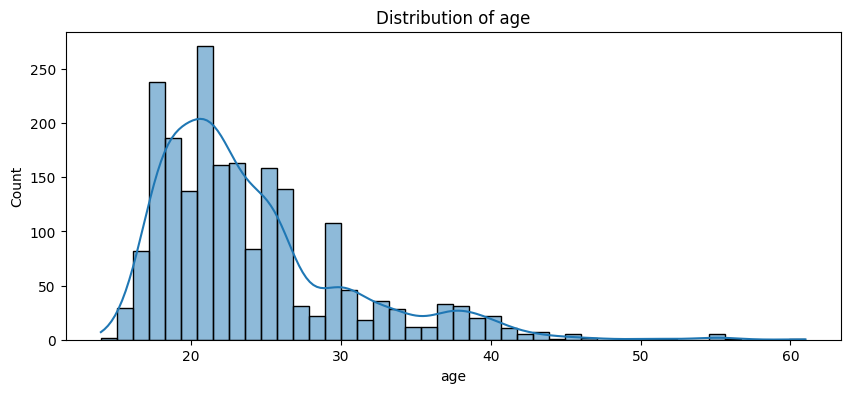

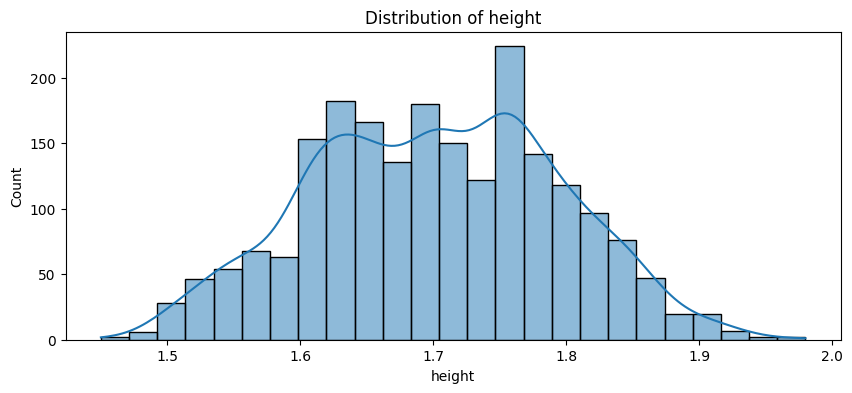

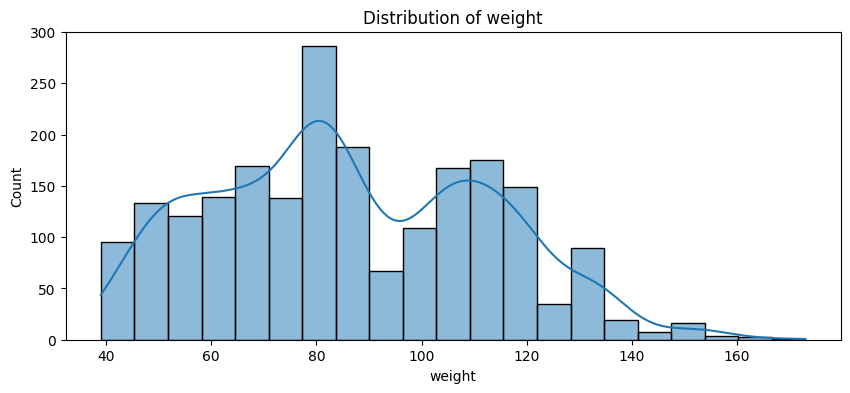

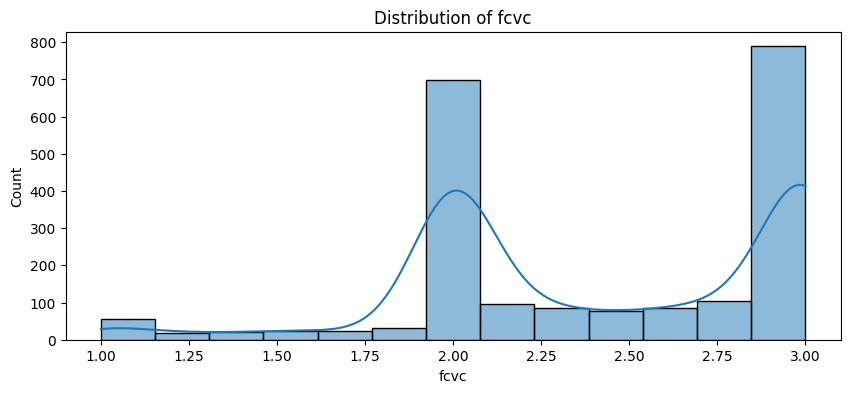

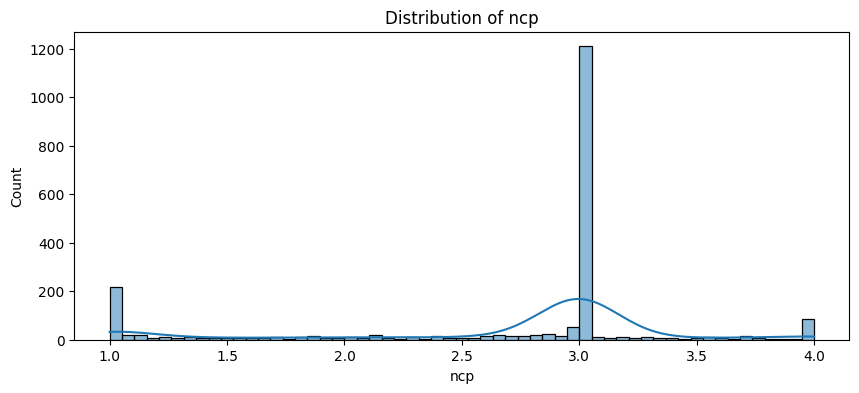

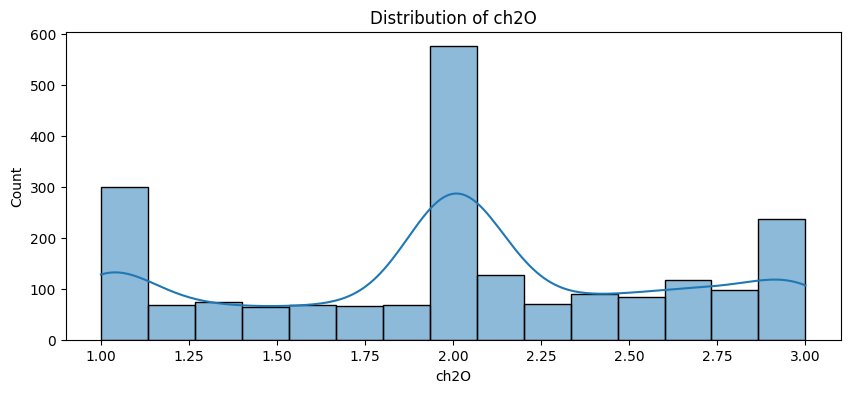

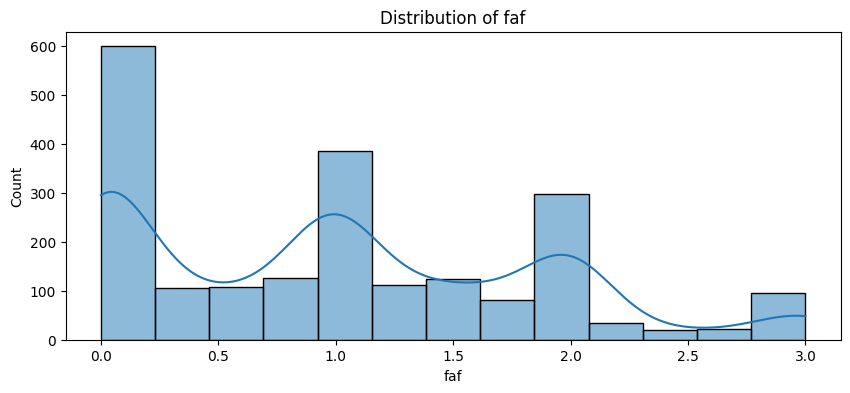

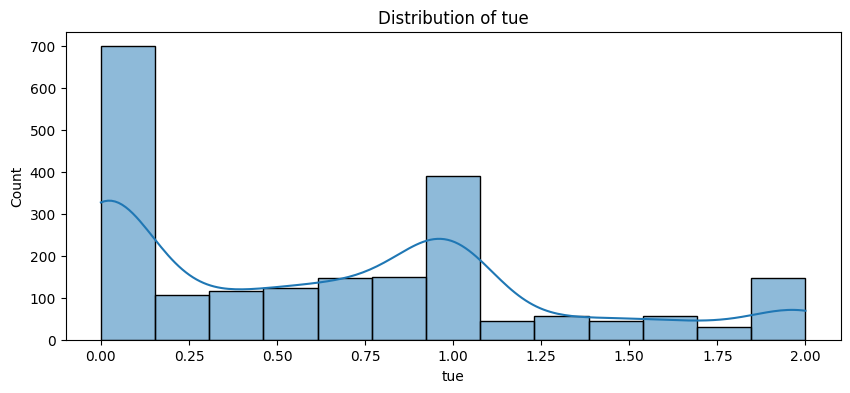

In [20]:
numeric_features = ['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2O', 'faf', 'tue']

for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

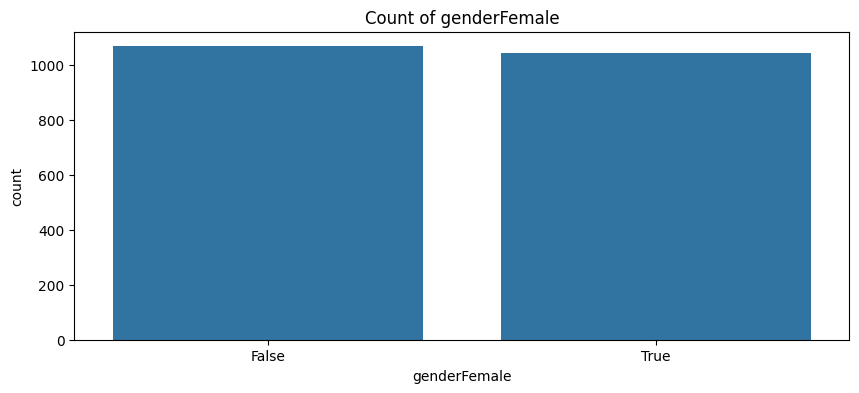

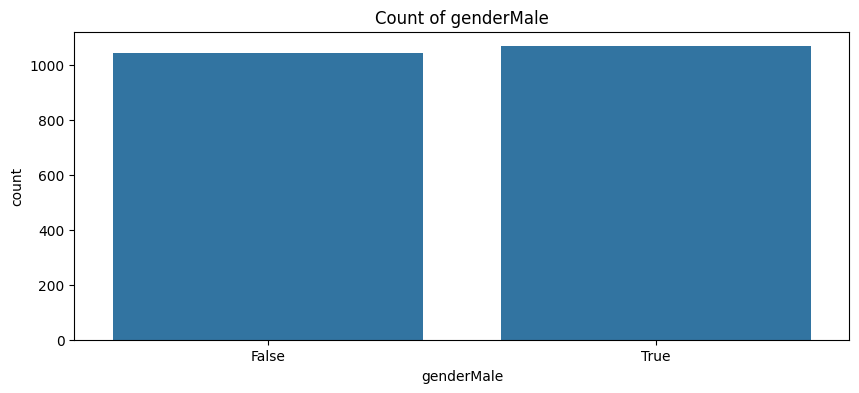

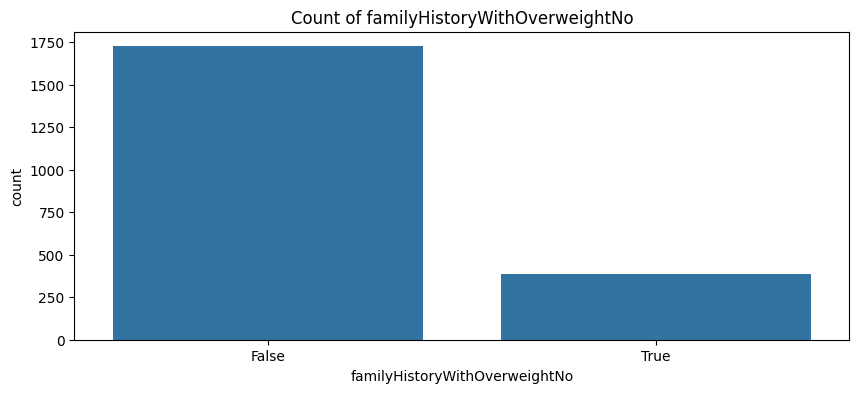

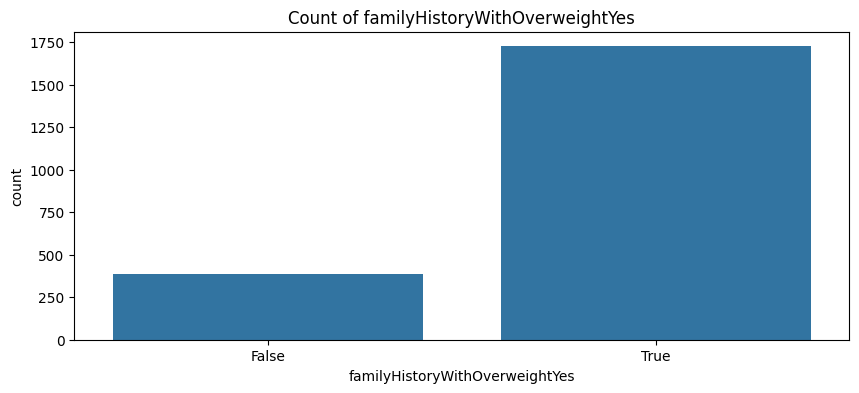

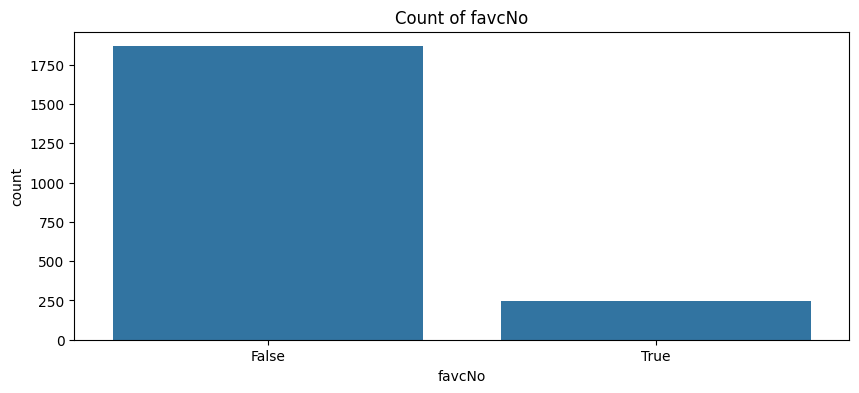

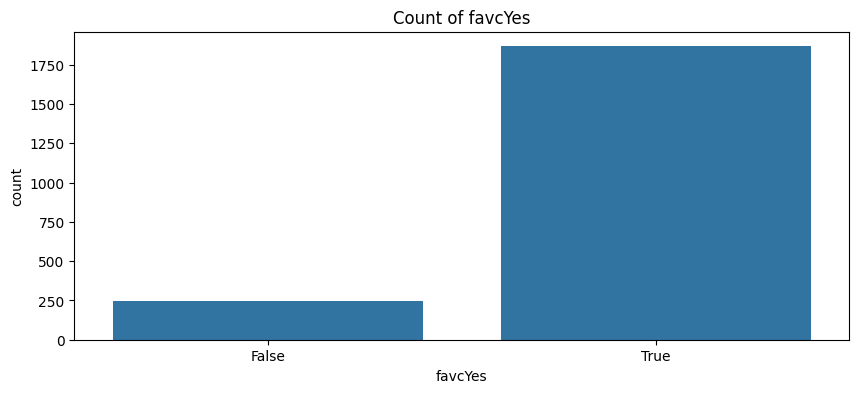

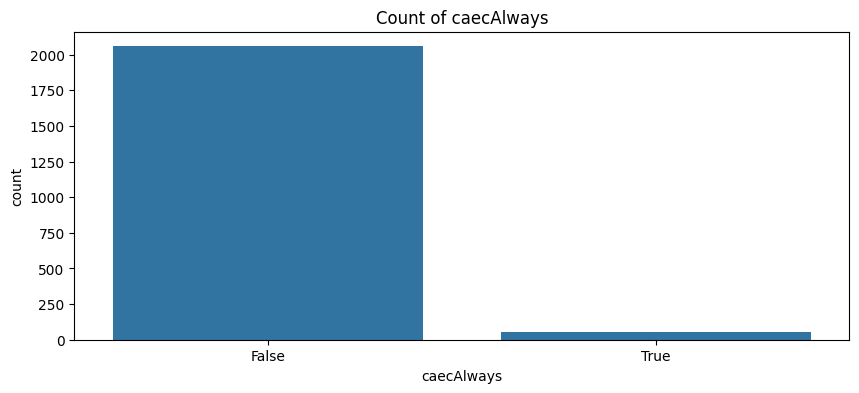

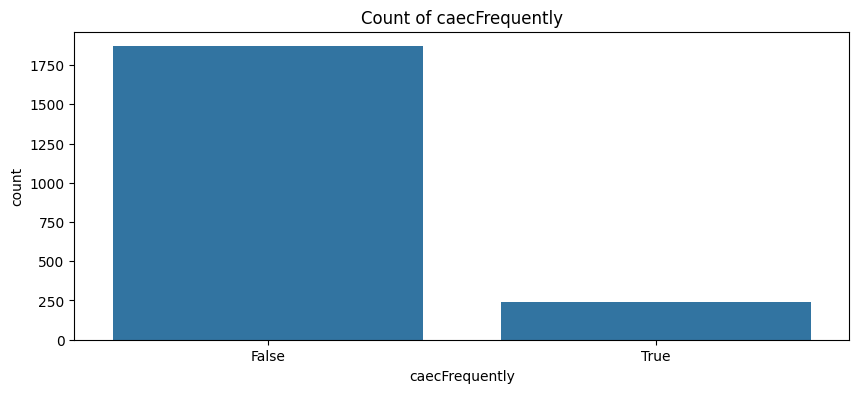

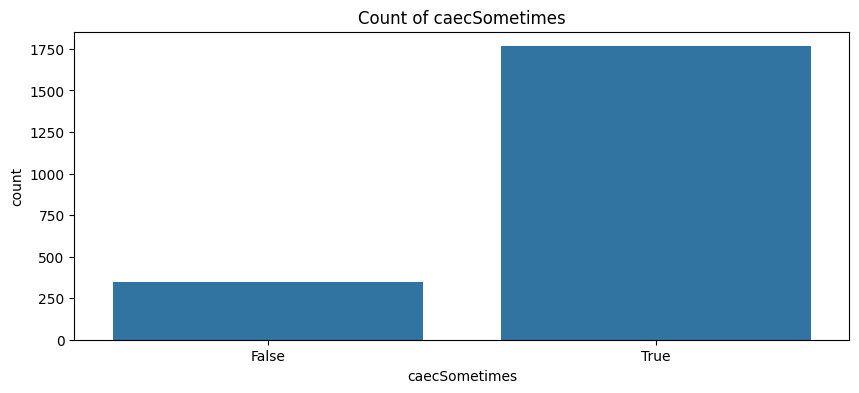

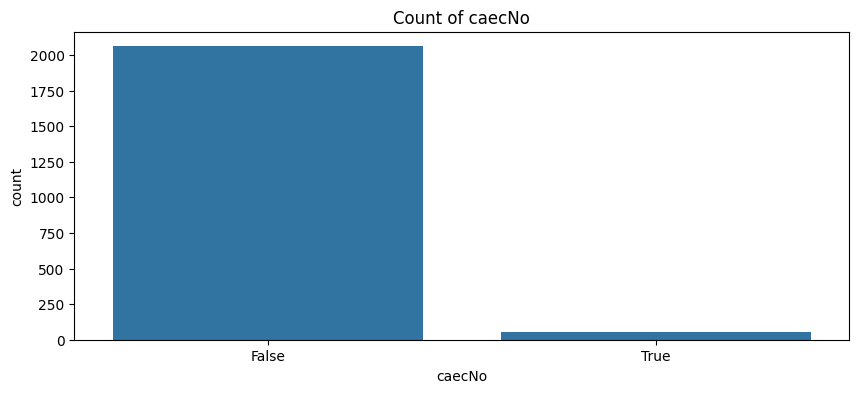

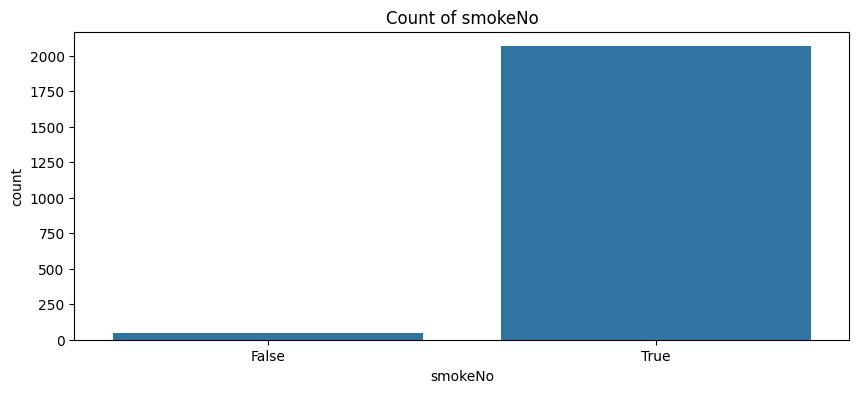

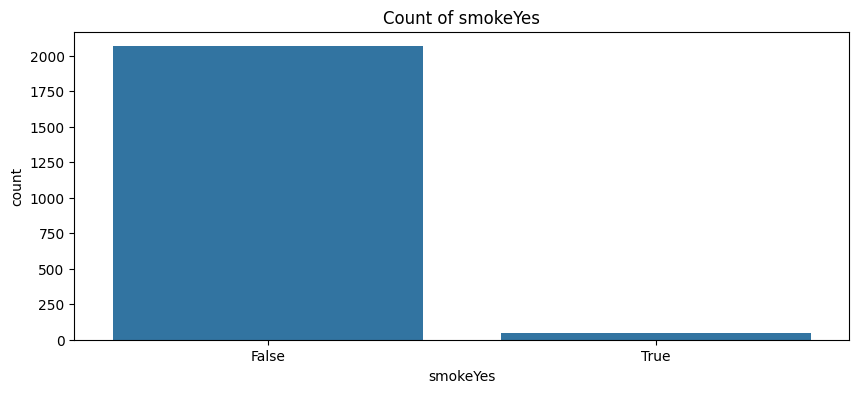

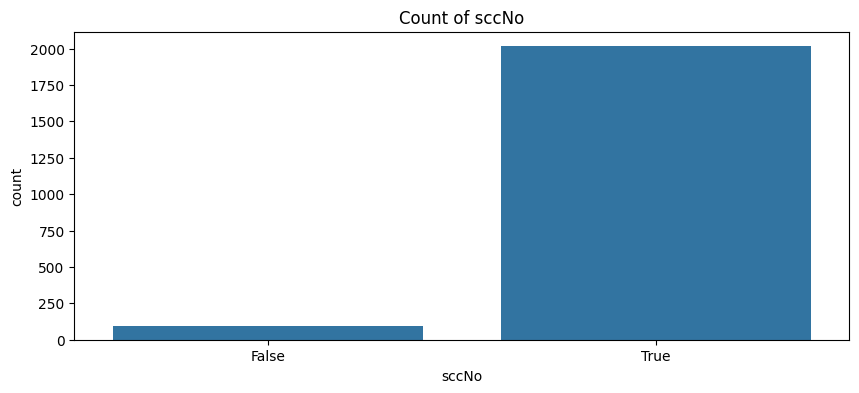

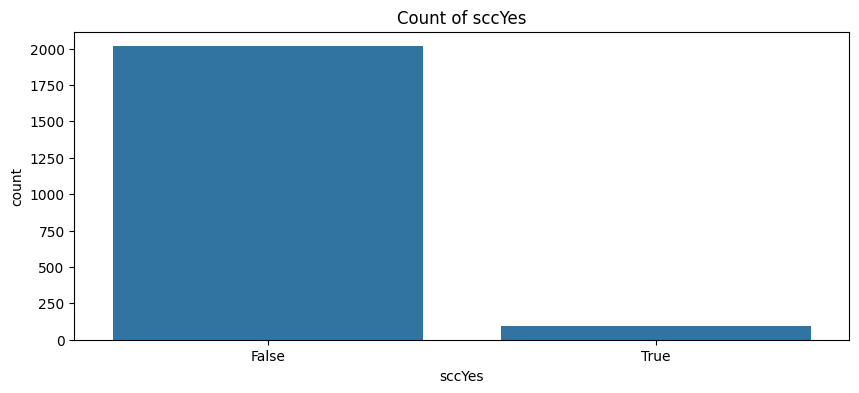

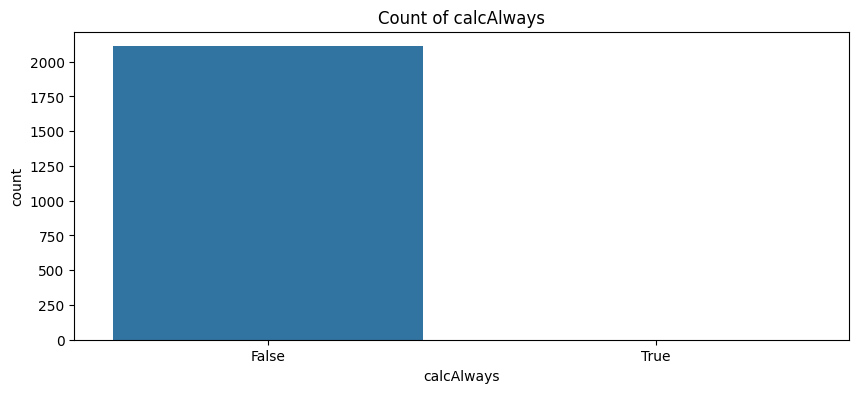

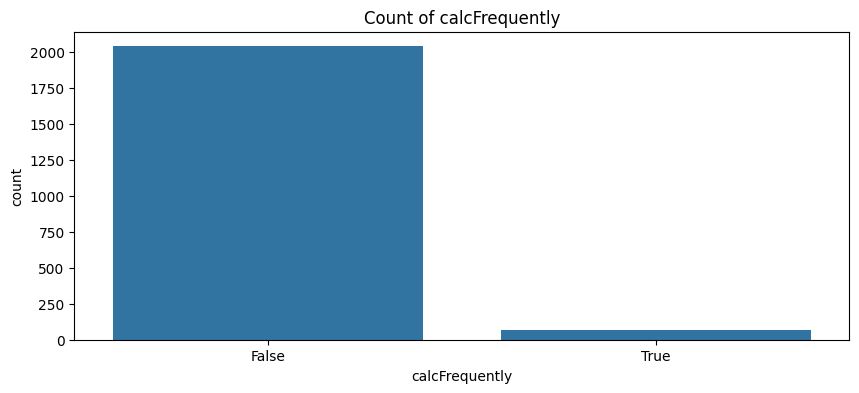

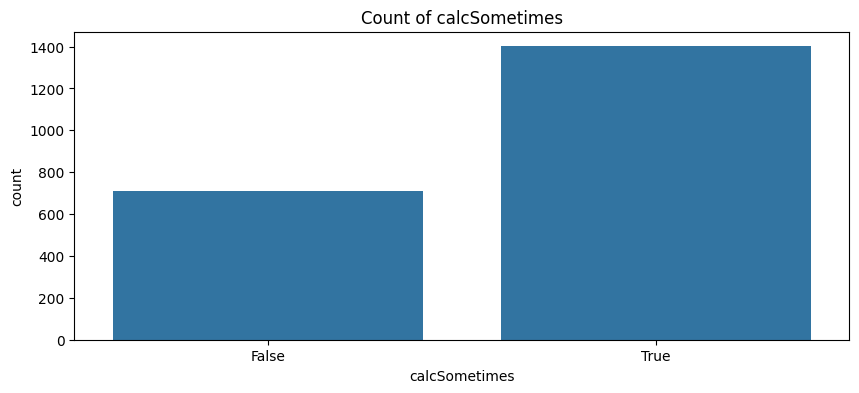

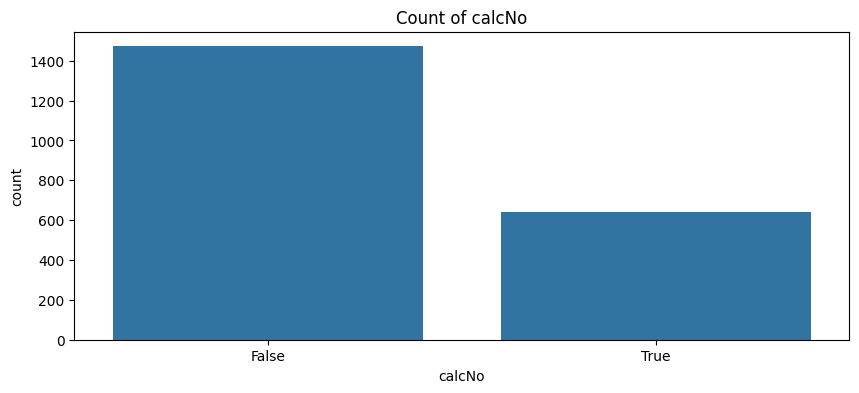

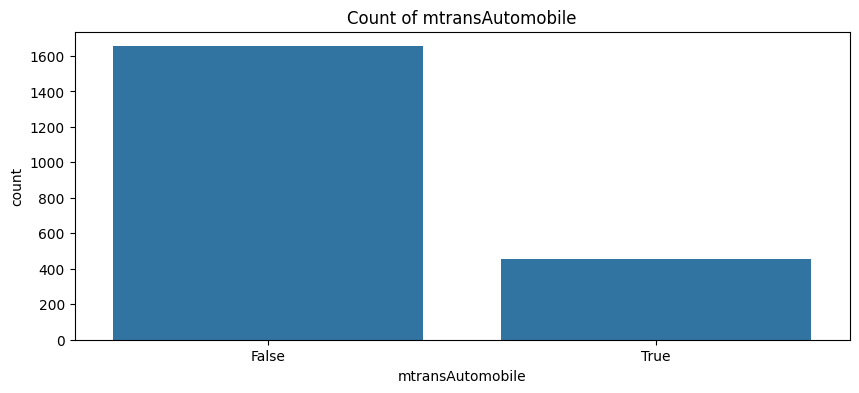

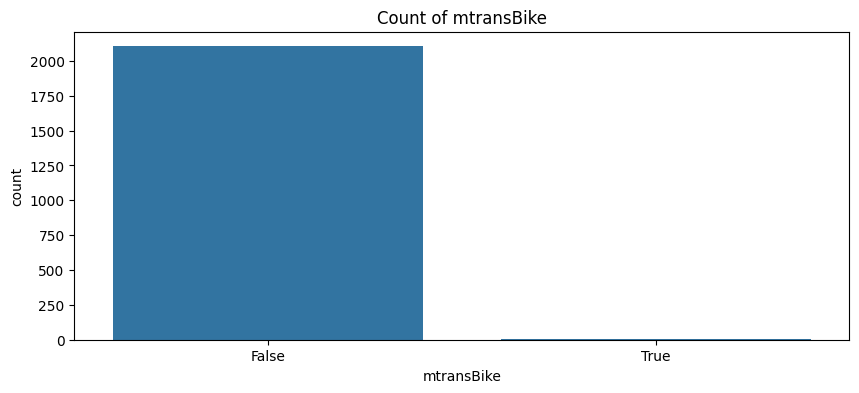

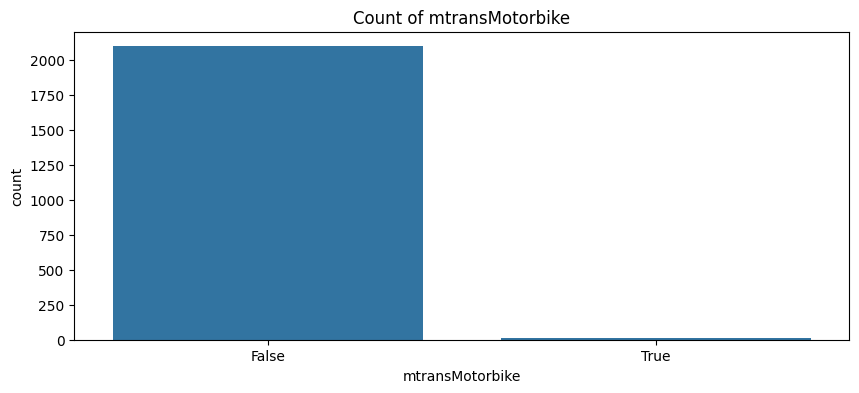

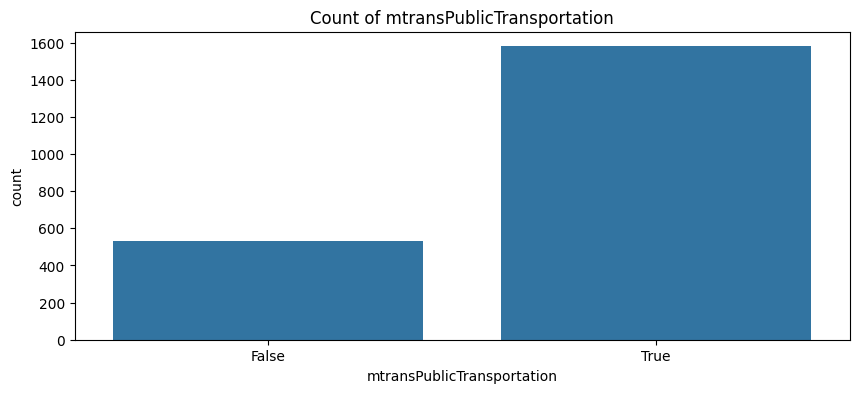

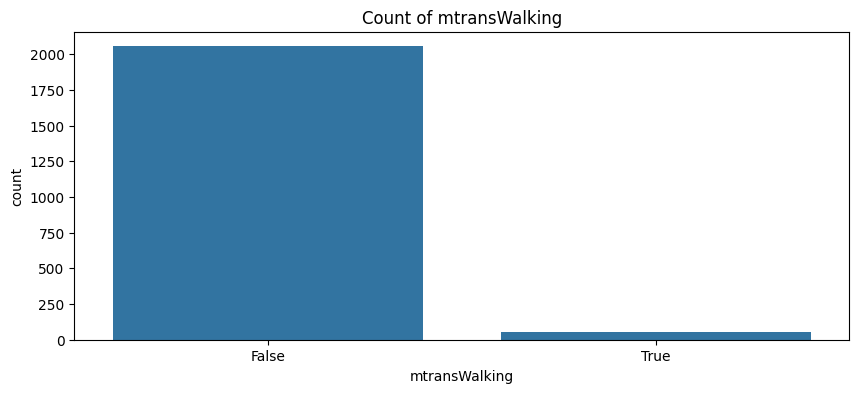

In [21]:
categorical_features = [
    'genderFemale', 'genderMale', 'familyHistoryWithOverweightNo',
    'familyHistoryWithOverweightYes', 'favcNo', 'favcYes', 'caecAlways',
    'caecFrequently', 'caecSometimes', 'caecNo', 'smokeNo', 'smokeYes',
    'sccNo', 'sccYes', 'calcAlways', 'calcFrequently', 'calcSometimes',
    'calcNo', 'mtransAutomobile', 'mtransBike', 'mtransMotorbike',
    'mtransPublicTransportation', 'mtransWalking'
]

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}')
    plt.show()


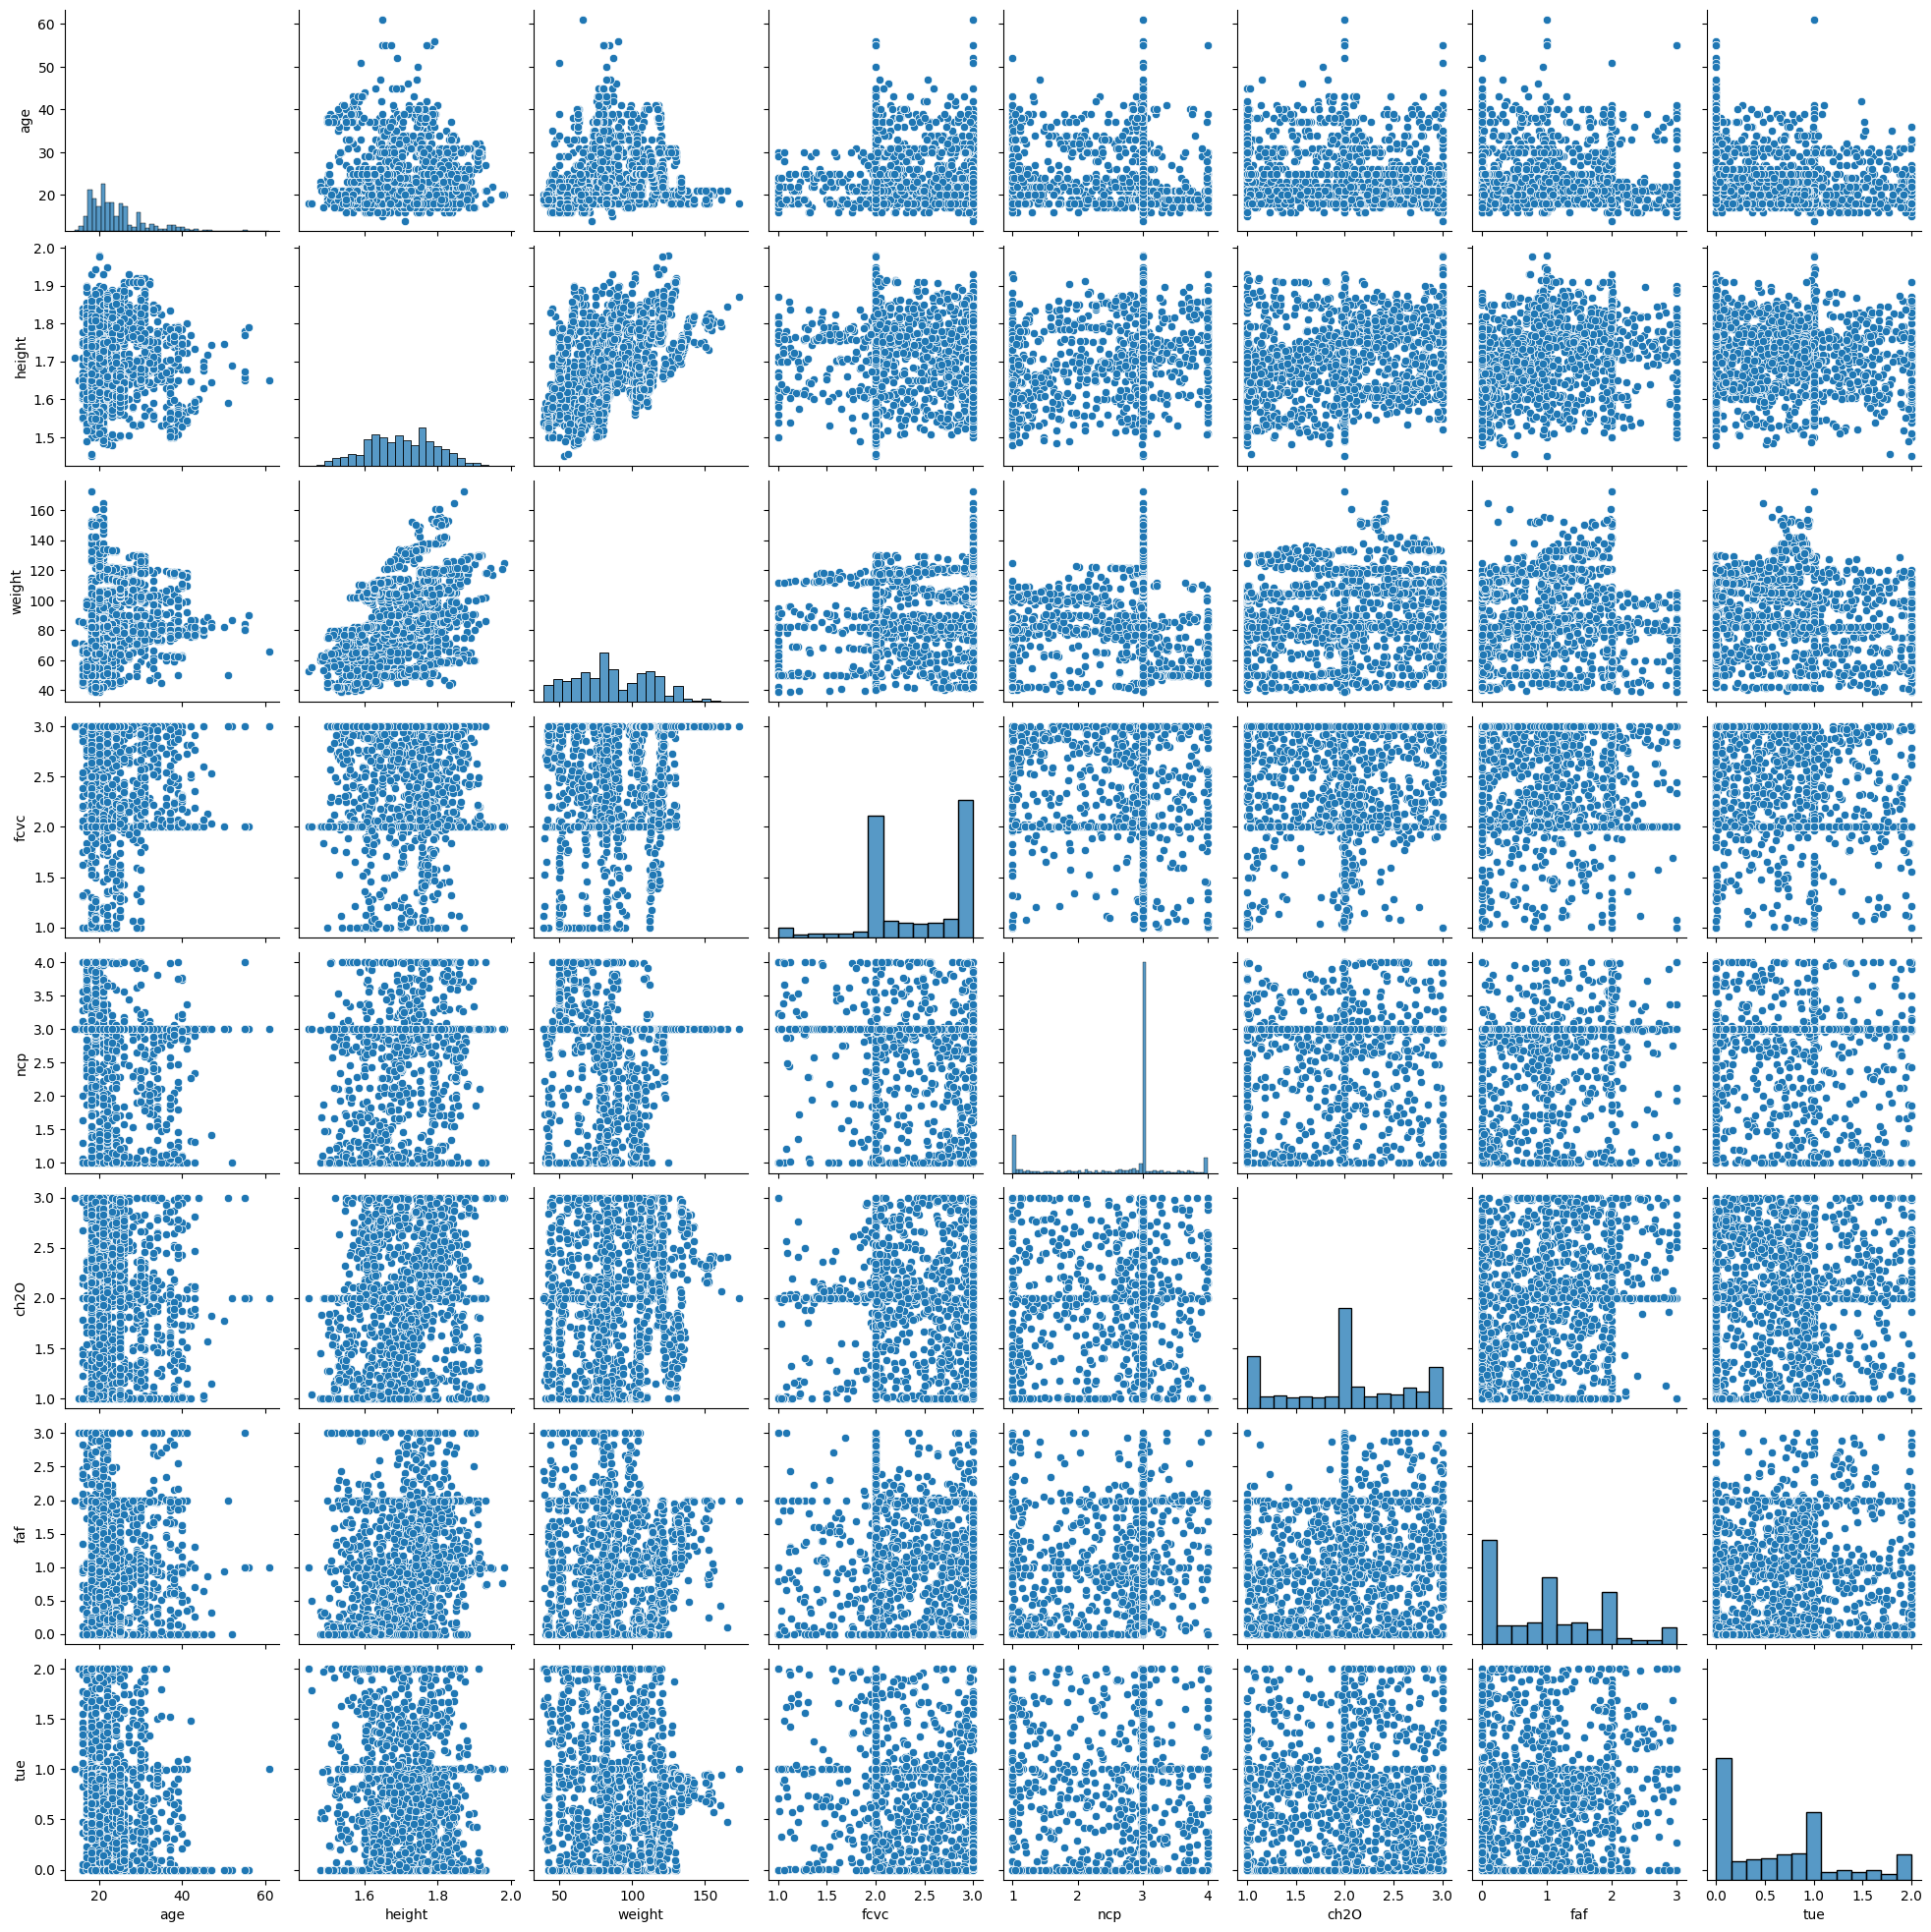

In [22]:
sns.pairplot(df[numeric_features])
plt.show()

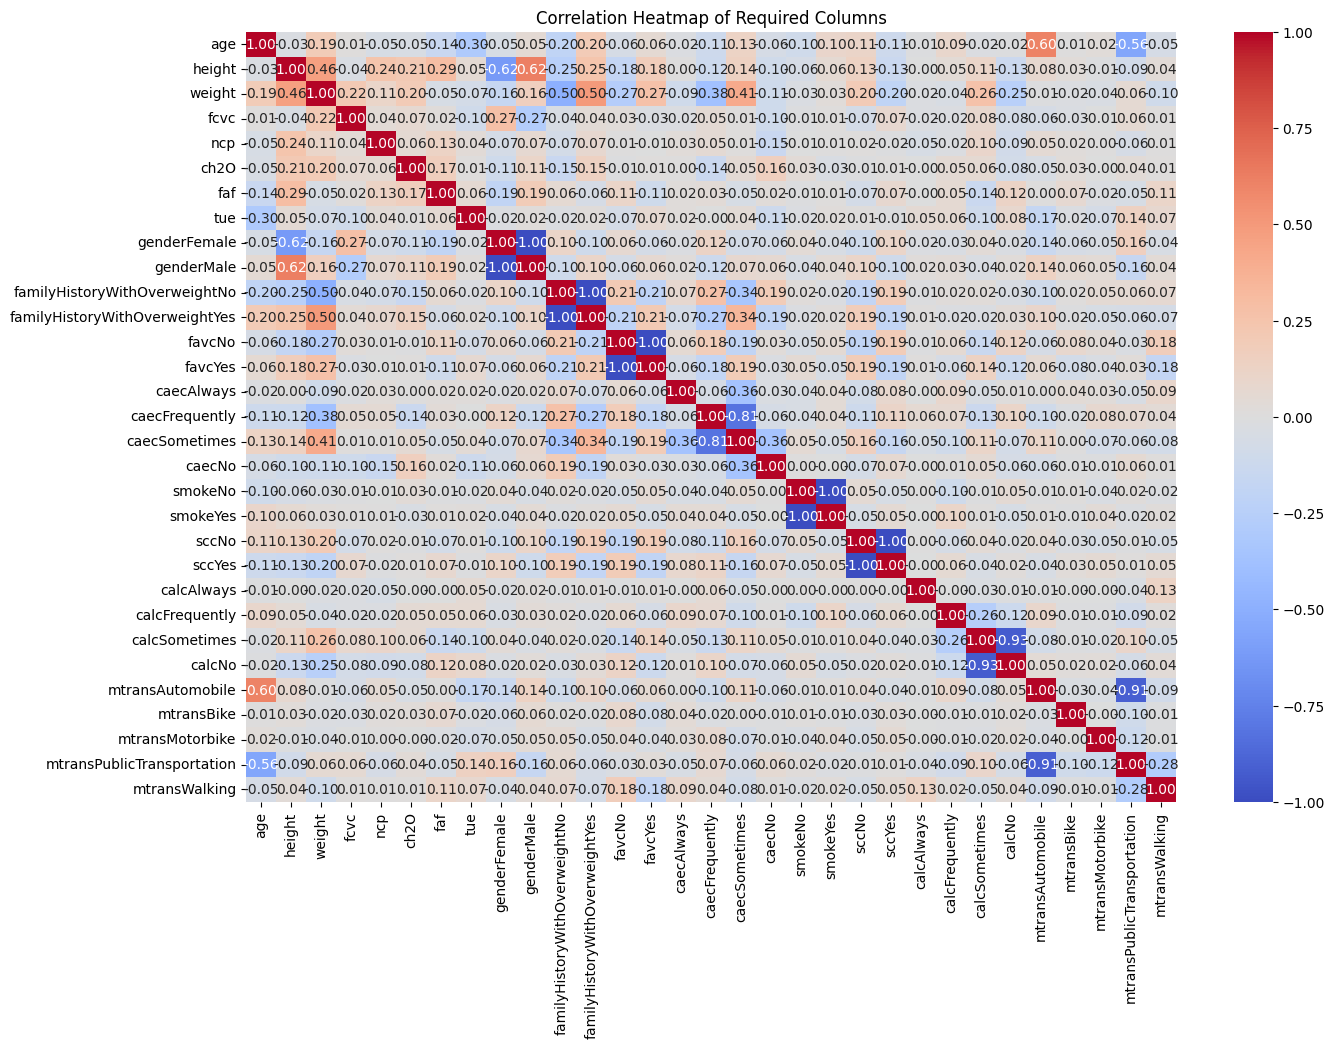

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[required_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Required Columns')
plt.show()

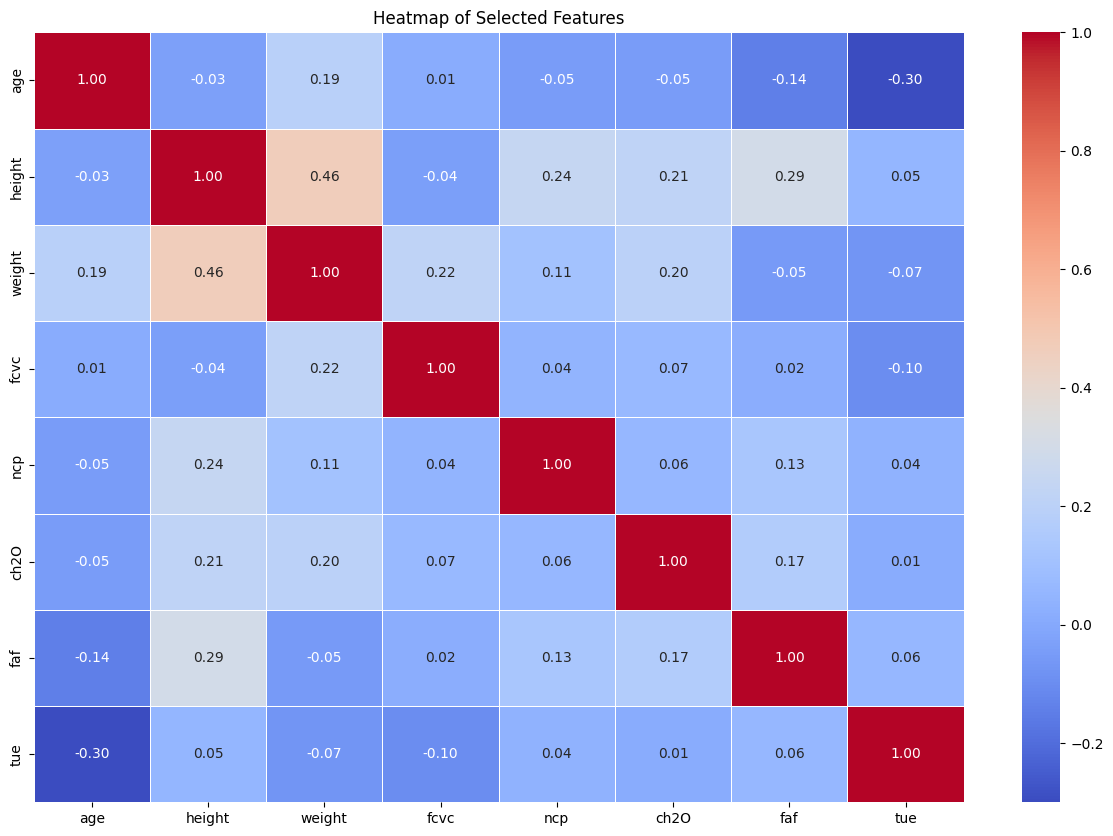

In [24]:
selected_features = ['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2O', 'faf', 'tue']

df_selected = df[selected_features]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Selected Features")
plt.show()

In [25]:
selected_features = ['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2O', 'faf', 'tue']

df_selected = df[selected_features]

print("Descriptive Statistics:")
print(df_selected.describe())

Descriptive Statistics:
               age       height       weight         fcvc          ncp  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     23.972525     1.701677    86.586058     2.419043     2.685628   
std       6.308664     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.000000     1.630000    65.473343     2.000000     2.658738   
50%      22.000000     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              ch2O          faf          tue  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.00

In [26]:
missing_values = df_selected.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age       0
height    0
weight    0
fcvc      0
ncp       0
ch2O      0
faf       0
tue       0
dtype: int64


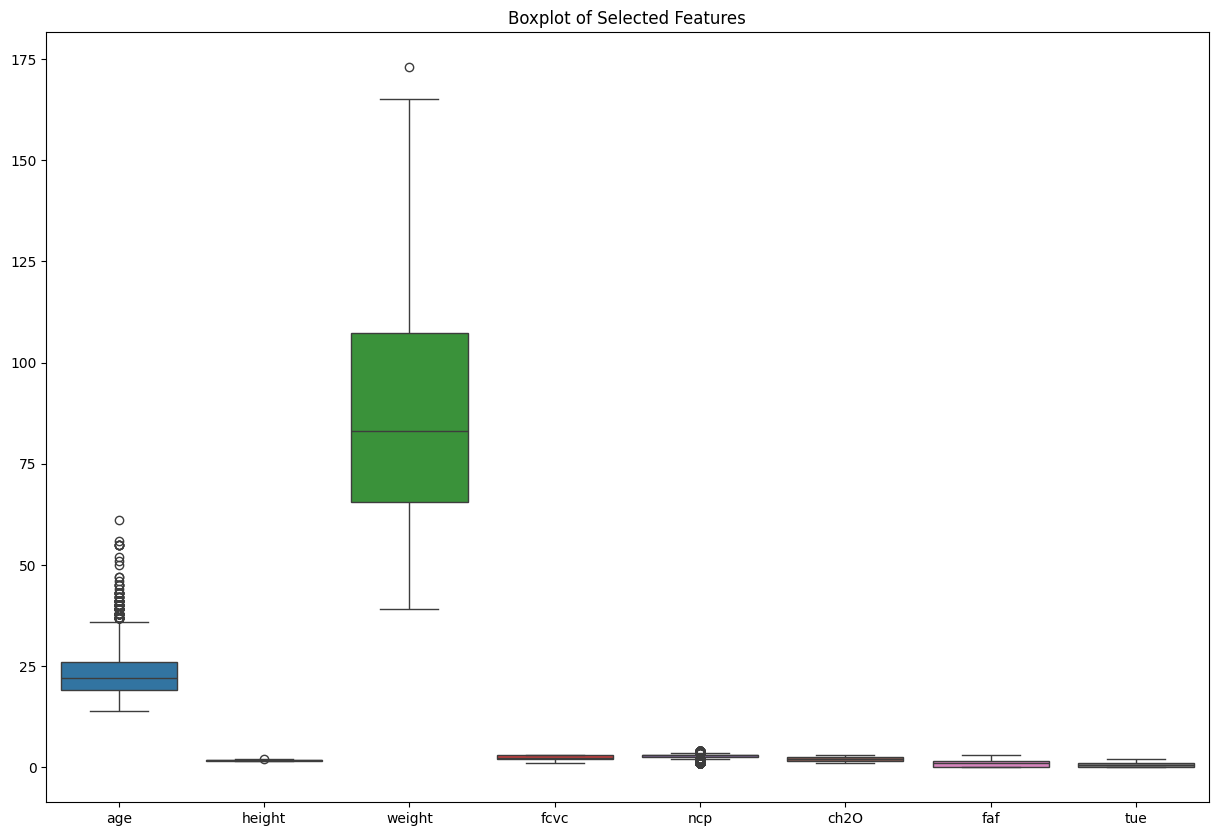

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_selected)
plt.title("Boxplot of Selected Features")
plt.show()

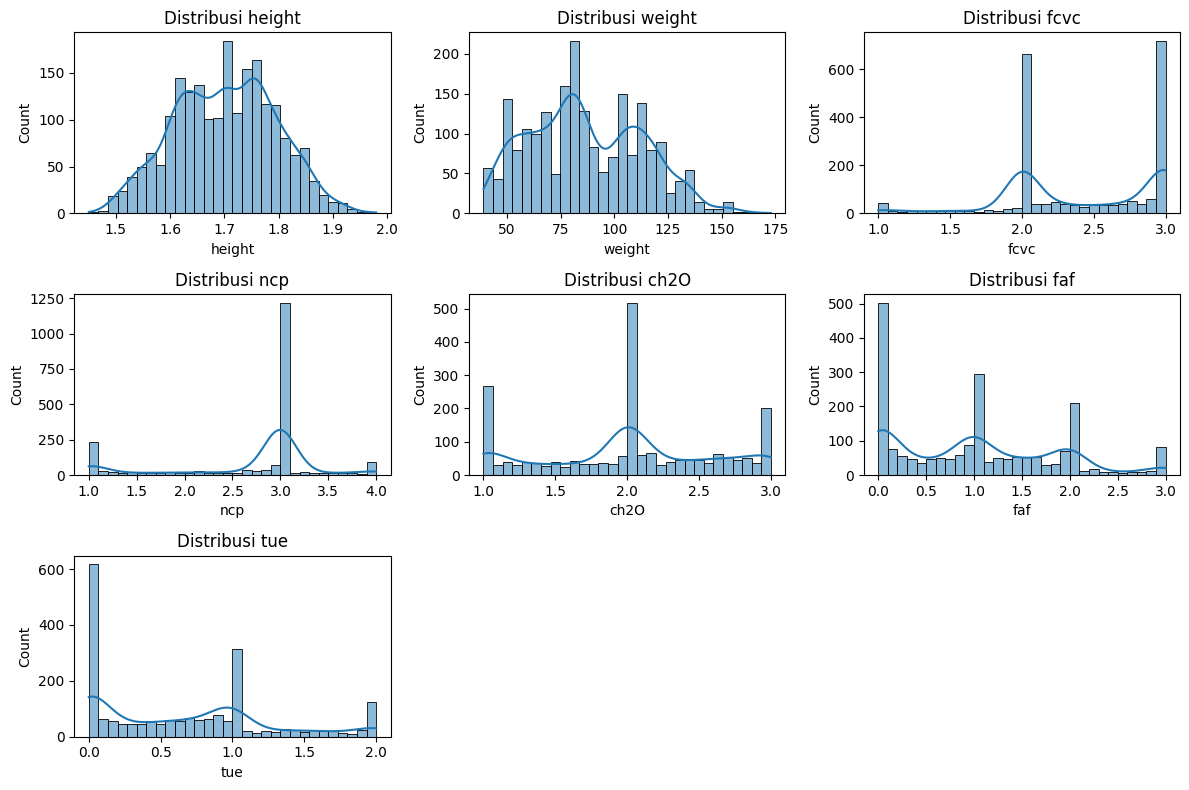

<Figure size 1200x800 with 0 Axes>

In [28]:
# Pisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Visualisasi distribusi numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Visualisasi distribusi kategorikal
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

KeyError: 'NObeyesdad'

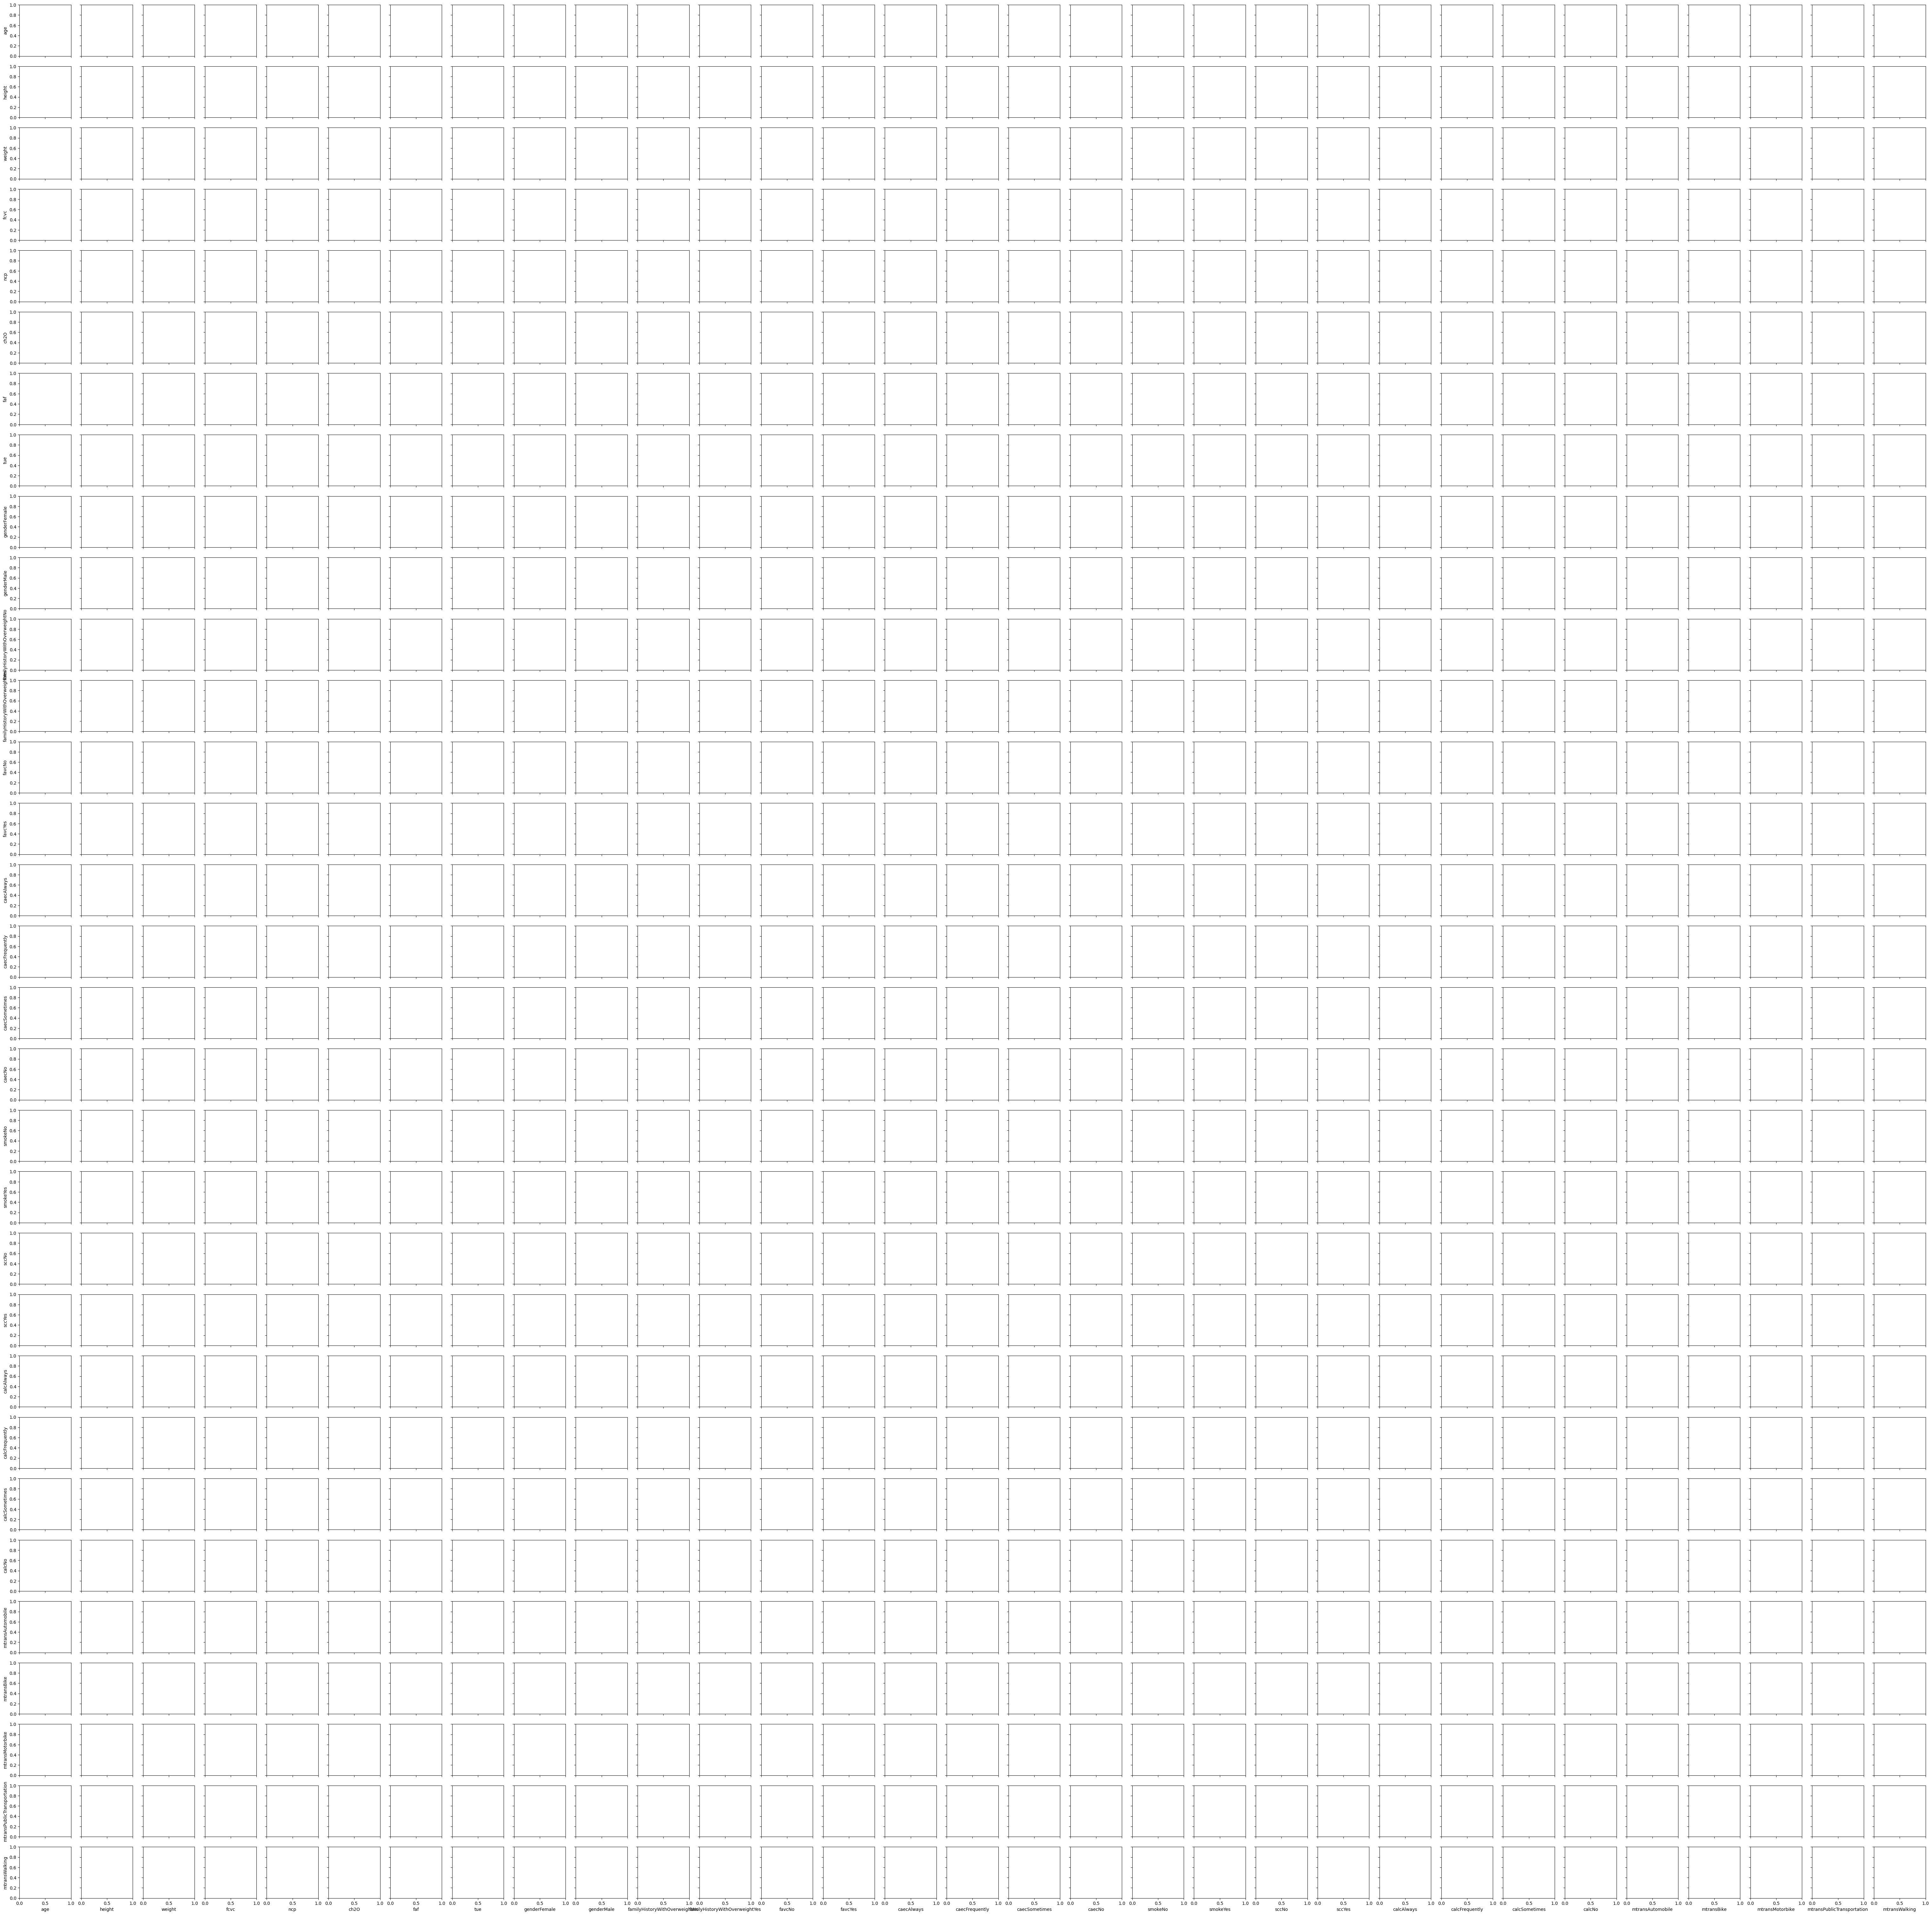

In [29]:
sns.pairplot(df, hue='NObeyesdad')

# Modeling

In [31]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix

# Cross-validation untuk menilai kestabilan model
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean():.4f}')

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best CV accuracy: {grid_search.best_score_:.4f}')

# Evaluasi dengan confusion matrix
y_pred_best = grid_search.best_estimator_.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
print(f'Confusion Matrix:\n{conf_matrix}')

# ROC-AUC Score
if len(set(y_test)) > 2:  # Cek apakah klasifikasi multi-kelas
    roc_score = roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test), multi_class='ovr')
else:
    roc_score = roc_auc_score(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_score:.4f}')

# Feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
sorted_indices = feature_importances.argsort()[::-1]

print("Feature Importances:")
for idx in sorted_indices[:10]:  # Menampilkan 10 fitur paling penting
    print(f'{features[idx]}: {feature_importances[idx]:.4f}')

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Pisahkan fitur dan target
X = df_encoded.drop(columns=["NObeyesdad"])
y = df_encoded["NObeyesdad"]

# Normalisasi data numerik
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek hasil setelah preprocessing
X_train.head()

NameError: name 'categorical_cols' is not defined

In [ ]:
# Inisialisasi model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

NameError: name 'X_train' is not defined